In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base() 

In [5]:
 # Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Assign the measuremens and stations classes to variables called `Measaurement` and `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
 session = Session(engine)

In [9]:
# Set Vacation Dates 7/2-7/15

In [11]:
# review measurements data
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# review stations data
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [14]:
# review column and datatype
ins = inspect(engine)
columns = ins.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# review column and datatype
ins = inspect(engine)
columns = ins.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Design a query to pull date and prcp values for the last 12 months of precipitation data
# the lastest date 8/23/2017 as such the last 12 month is from 8-24-2016 to 8-23-2017
YearBeg = dt.datetime(2016,8,23) #set one less date before the year beg date 8/24
YearEnd = dt.datetime(2017,8,24) #set one more date after the year end date 8/23

results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > YearBeg).filter(Measurement.date < YearEnd).all()

In [17]:
 # Unpack the `dates` and `prcp` from results and save into separate lists
OneYearDates = [r[0] for r in results]
OneYearPrcp = [r[1] for r in results]

In [18]:
# Save data in dataframe and set `date` as index
PrcpbyD = pd.DataFrame({'date':OneYearDates,'precipitation':OneYearPrcp})
PrcpbyD.set_index('date',inplace=True)
PrcpbyD.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


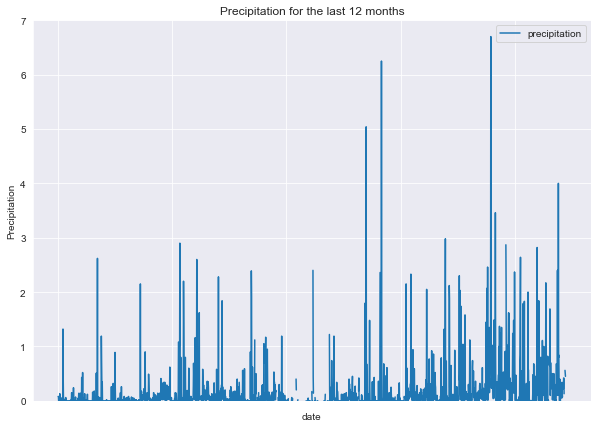

In [19]:
#Plot the results using the DataFrame plot method.
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,7))
PrcpbyD.plot(ax=ax)

#set major ticks format
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_ylim(0,max(PrcpbyD['precipitation']+.3))
ax.set_title("Precipitation for the last 12 months")
ax.set_ylabel("Precipitation")
ax.set_xlabel("date")
plt.xticks(rotation=45)
plt.savefig("3a.precipitation_last_12_months.png")
plt.show()

In [20]:
#Use Pandas to print the summary statistics for the precipitation data
PrcpbyD.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
#Design a query to calculate the total number of stations.
NumStation = session.query(Measurement).group_by(Measurement.station).count()
#double check using Stations table
NumStation1 = session.query(Station).group_by(Station.station).count()
print(f"{NumStation} stations from Measurement table and {NumStation1} stations from Station table")  


9 stations from Measurement table and 9 stations from Station table


In [54]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
#Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
Active = session.query(Measurement.station, Station.name, func.count(Measurement.index)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.index).desc()).statement

#write into DataFrame
dfActive = pd.read_sql_query(Active, session.bind)

#Most Active Stations Number
ASNum = dfActive["station"][0]
#Most Active Stations Name
AS = dfActive['name'][0]
#highest number of observation
ASC = dfActive['count_1'][0]

print(f"Station #{ASNum}-'{AS}' has the highest number of observations: {ASC}.")

# List the full list of stations
dfActive

AttributeError: type object 'measurement' has no attribute 'index'

In [48]:
## Plot the results as a histogram with bins=12.
sns.set_style(style="darkgrid")
ax = TempData.plot(kind="hist",bins=12,figsize=(10,7))

ax.set_title("Frequency of the Tobs")
ax.set_ylabel("Frequency")
plt.savefig("3b.frequency_of_the_tobs.png")
plt.show()

NameError: name 'TempData' is not defined

In [36]:
# Design a query to show how many stations are available in this dataset?
num_station = session.query(Measurement).group_by(Measurement.station).count()
print (num_station)

9


In [37]:

most_active = active_station[0][0]
most_active

'USC00519281'

In [40]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mst_act_station = stations[0][0]
tmp_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == mst_act_station).all()
print (tmp_query)

[(54.0, 85.0, 71.66378066378067)]


In [46]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
##and return the minimum, average, and maximum temperatures for that range of dates.
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates
# Previourly choosen Vacation Dates 7/2-7/15
VacaBeg = dt.datetime(2017,7,1) #set one less date before the year beg date 7/2
VacaEnd = dt.datetime(2017,7,15) #set one less date before the year beg date 7/15

calc_temp = session.query(func.avg(Measurement.tobs),func.max(Measurement.tobs),func.min(Measurement.tobs)).\
    filter(Measurement.date > VacaBeg).filter(Measurement.date < VacaEnd).statement
#write into a dataframe
TempStat = pd.read_sql_query(calc_temp, session.bind)
TempStat



,avg_1,max_1,min_1
0,78.295455,87.0,69.0


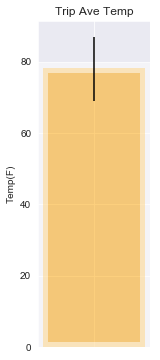

In [47]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
## Use the average temperature as the bar height.
## Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

TAve = TempStat['avg_1']
TMax = TempStat['max_1']
TMin = TempStat['min_1']
 
x = np.arange(1,2)
sns.set_style(style="darkgrid")
width =0.1
plt.figure(figsize=(2,6))
plt.bar(x,TAve,width,linewidth=10,alpha=0.5, tick_label="", color="orange",yerr=(TAve-TMin,TMax-TAve))

plt.title("Trip Ave Temp")

plt.ylabel("Temp(F)")
plt.savefig("3c.Trip_Ave_Temp.png")
plt.show()

In [52]:
# write function calc_temps, start date and end date in the format %Y-%m-%d 
#and return the minimum, average, and maximum temperatures for that range of dates.
import datetime
def calc_temps(date1,date2):

    start = datetime.datetime.strptime(date1, '%Y-%m-%d')
    end = datetime.datetime.strptime(date2, '%Y-%m-%d')

    temps_stats = session.query(func.avg(Measurement.tobs),func.min(Measurement.tobs),func.max(Measurement.tobs)).\
            filter(Measurement.date > start).\
            filter(Measurement.date < end).all()
    return(temps_stats)

In [50]:

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]